# Salary Dataset
The Salary dataset is a simple yet insightful collection of data that explores the relationship between professional experience and compensation.With its straightforward structure, the dataset provides an excellent starting point for data analysis, making it suitable for educational purposes, research projects, and practical applications in workforce analytics.It contains two primary columns:


1. YearsExperience: This column represents the number of years an individual has worked in their professional career. It is expressed as a numerical value and serves as a key factor influencing salary progression over time.

2. Salary: This column contains the corresponding annual income (in monetary units) of the individual. The salary values are typically presented in consistent currency terms and reflect the financial compensation associated with different levels of experience.

This dataset is particularly useful for:

* Regression Analysis: Exploring the linear or non-linear relationship between experience and salary.

* Predictive Modeling: Building machine learning models to forecast salary based on years of experience.
 
* Data Visualization: Creating scatter plots or trendlines to visualize how salary changes with experience.

* Workforce Insights: Gaining an understanding of how experience impacts earnings, potentially across industries or job roles.


## Importing Libraries


In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

## Loading the Dataset

In [2]:
df=pd.read_csv(r"C:\Users\alant\Downloads\Salary_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


## Rename the Columns

#### We can use rename() function to avoid unnecessary spaces,special characters in column name

In [3]:
df=df.rename(columns=({"Unnamed: 0":"Sl_no"}))

## Data Cleaning

#### This is to check whether there is any null values,duplicates values present in the dataset.If yes, you can use drop() function to remove those null or duplicates

In [4]:
df.isna().sum()

Sl_no              0
YearsExperience    0
Salary             0
dtype: int64

In [5]:
df.duplicated().sum()

0

## Taking the first 5 rows using head() function

In [6]:
df.head(5)

,Sl_no,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


## Taking the last 5 rows using tail() function


In [7]:
df.tail(5)

,Sl_no,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


 ## Checking Outlier Using Boxplot   

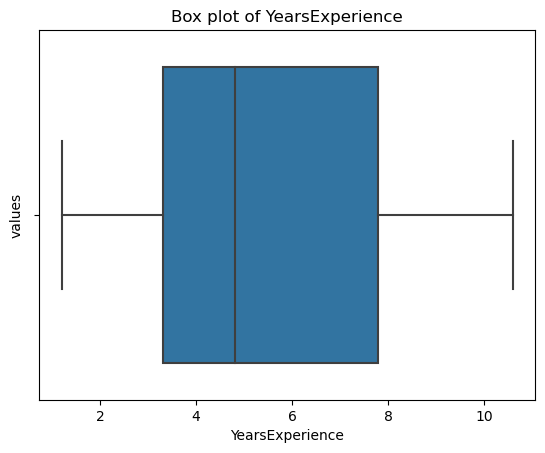

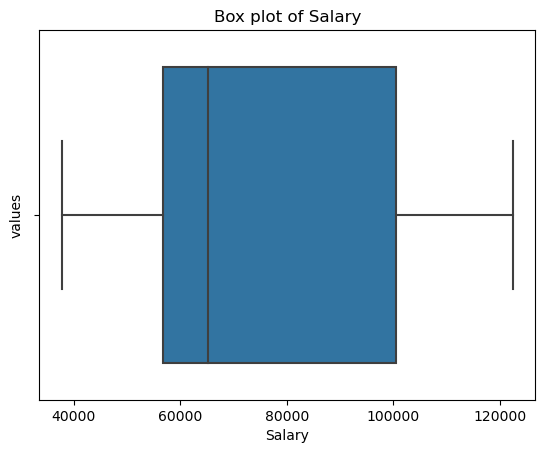

In [8]:
col = df.select_dtypes(include='float64')

for i in col:
    sns.boxplot(data = df, x = i)
    plt.title(f"Box plot of {i}")
    plt.xlabel(i)
    plt.ylabel("values")
    plt.show()

## Boxplot

(array([0, 1]), [Text(0, 0, 'YearsExperience'), Text(1, 0, 'Salary')])

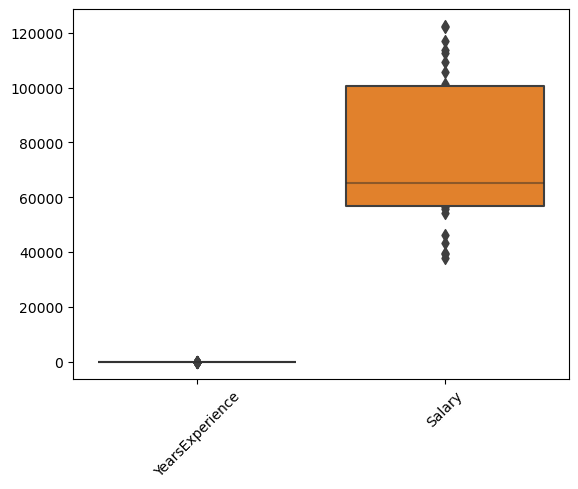

In [9]:
df=df.select_dtypes(include='float64')
sns.boxenplot(data=df)
plt.xticks(rotation=45)

## Statistical Analysis
### 1. Describe

In [10]:
numeric_data=df.select_dtypes(['float64'])
des=numeric_data.describe()
print(des)


       YearsExperience         Salary
count        30.000000      30.000000
mean          5.413333   76004.000000
std           2.837888   27414.429785
min           1.200000   37732.000000
25%           3.300000   56721.750000
50%           4.800000   65238.000000
75%           7.800000  100545.750000
max          10.600000  122392.000000


### 2. Covariance

                 YearsExperience        Salary
YearsExperience         8.053609  7.610630e+04
Salary              76106.303448  7.515510e+08


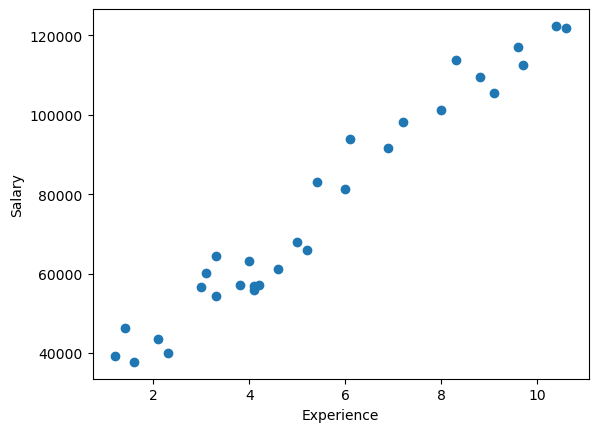

In [11]:
covariance=numeric_data.cov()
print(covariance)
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

### 3.Corelation

In [12]:
corelation=numeric_data.corr()
print(corelation)


                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


## Heatmap

<Axes: >

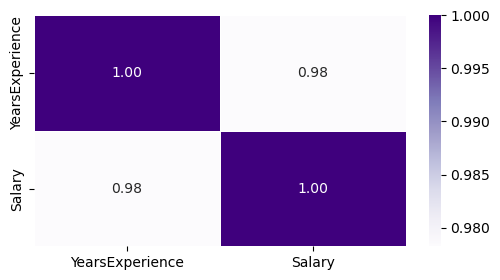

In [13]:
plt.figure(figsize=(6,3))
sns.heatmap(corelation, cmap="Purples",annot=True,fmt='.2f',linewidths=0.5)

## Seperating dependent & Independent variables

In [14]:
x=df['YearsExperience'].values
y=df['Salary'].values

In [15]:
x=pd.DataFrame(x)
y=pd.DataFrame(y)

## Split the Dataset into Training & Testing

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Building the Linear Regression Model

In [17]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## Predicting the test data

In [18]:
y_pred=model.predict(x_test)
print("Mean absolute  error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("Root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))






Mean absolute  error: 2446.17236904651
Mean squared error: 12823412.298126565
Root mean squared error: 3580.9792373213454


## Caluculating the Accuracy

In [19]:
score=r2_score(y_test,y_pred)
print("The Accuracy is:",score*100,'%')


The Accuracy is: 98.8169515729126 %


## Summary

The Salary dataset provides valuable insights into the relationship between professional experience and compensation. The analysis reveals a strong positive linear correlation, as evidenced by the high R-squared value (0.9024) from the regression model. This indicates that YearsExperience is a significant predictor of Salary, explaining over 90% of the variation.Using the dataset, a scatter plot can visually demonstrate the relationship between experience and salary. The line of best fit from the regression model highlights the positive trend.This visualization reinforces the conclusion that as professional experience increases, salaries tend to rise in a predictable manner, making this dataset ideal for modeling and analysis.

The dataset is well-suited for:

1. Regression Analysis to explore salary trends. 

2. Predictive Modeling for estimating earnings based on experience.

Educational and Research Purposes due to its straightforward structure and clear relationship.
In conclusion, this dataset effectively demonstrates how salary increases with experience, offering a practical foundation for understanding compensation dynamics and building predictive tools.